# Explore here

In [1]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
print("✅ Entrenando solo en CPU")

2025-09-04 18:42:14.792868: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


✅ Entrenando solo en CPU


In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✔️ GPU configurada con memory growth")
    except RuntimeError as e:
        print(e)

✔️ GPU configurada con memory growth


In [3]:
# Your code here
# Your code here
import os
import shutil
import random

lista_fotografias = os.listdir('../data/raw/train')

for fotografia in lista_fotografias:
    if not fotografia.endswith('.jpg'):
        continue
    if 'cat' in fotografia:
        #2 de cada 10 veces mover el archivo a processed/test/cat y 8 de cada 10 veces a processed/train/cat
        if random.random() < 0.2:
            destino = '../data/processed/test/cat'
        else:
            destino = '../data/processed/train/cat'
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    elif 'dog' in fotografia:
        if random.random() < 0.2:
            destino = '../data/processed/test/dog'
        else:
            destino = '../data/processed/train/dog'
        os.makedirs(destino, exist_ok=True)
        shutil.move(os.path.join('../data/raw/train', fotografia), destino)
    else:
        print(f'Animal desconocido: {fotografia}')




In [4]:
#cambiar de tamaño las imagenes para que todas sean de 200x200
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

def resize_images(directory, size=(200, 200)):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)# esto une la la carpeta con el nombre del archivo, pero es la forma mas rapida de recorrer todos los archivos de la carpeta
            img = load_img(img_path, target_size=size)
            img_array = img_to_array(img)
            save_img(img_path, img_array)

resize_images('../data/processed/train/cat')
resize_images('../data/processed/train/dog')
resize_images('../data/processed/test/cat')
resize_images('../data/processed/test/dog')

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x740d6737e520>

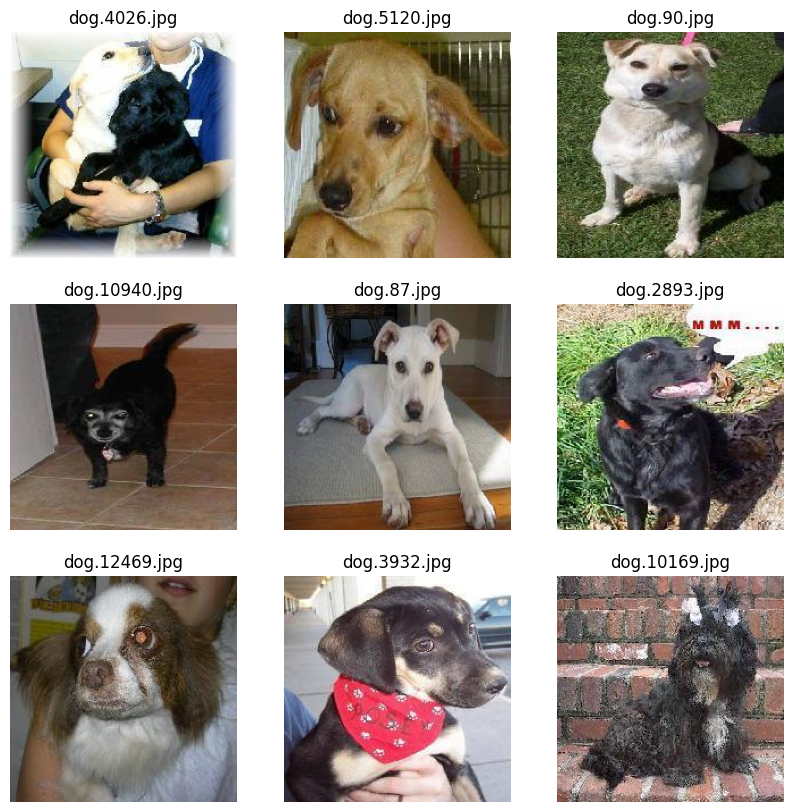

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    img_path = random.choice(os.listdir('../data/processed/train/dog'))
    img = load_img(os.path.join('../data/processed/train/dog', img_path))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(img_path.split('/')[-1])
    plt.axis('off')




In [6]:
for subdir in ["cat","dog"]:
    print(os.path.join("../data/raw/test", subdir))


from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

../data/raw/test/cat
../data/raw/test/dog


In [7]:
#mover los archivos de la  carpeta test desde las subcarpetas dog y cat a la carpeta test
for subdir in ['cat', 'dog']:
    subdir_path = os.path.join('../data/processed/test', subdir)#crea la ruta de las subcarpetas, a las cuales se les va a sacar los archivos
    for filename in os.listdir(subdir_path):#genera el nombre de lor archivos dentro de las subcarpetas dog y cat de train
        if filename.endswith('.jpg'):
            src_path = os.path.join(subdir_path, filename)#genera la ruta del archivo que se va a mover 
            dest_path = os.path.join('../data/processed/test', filename)#genera la ruta de destino para el archivo
            shutil.move(src_path, dest_path)#mueve las imagenes de las subcarpetas a la carpeta de test


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "../data/processed/train"
test_dir = "../data/processed"

datagentrainer = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrainer.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode="categorical"  # <-- Cambia esto
)

test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode=None  # Para predicción, usa None
)

Found 19993 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir="../data/processed/train" 
test_dir="../data/processed"#no va un /test?
datagentrainer = ImageDataGenerator()
datagentest = ImageDataGenerator()
train_data = datagentrainer.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=32,
    class_mode="categorical"
)
#test_data=datagentest.flow_from_directory(
 #   train_dir,
 #   target_size=(200,200),
  #  batch_size=32,
    # class_mode=None





Found 19993 images belonging to 2 classes.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../data/processed/train'
test_dir = '../data/processed/'

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

train_data = datagentrain.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              classes=['cat', 'dog']
)
test_data = datagentest.flow_from_directory(test_dir,
                                            target_size=(200, 200),
                                            batch_size=32,
                                            classes=['test']
)

Found 19993 images belonging to 2 classes.
Found 5007 images belonging to 1 classes.


In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Rescaling

model = Sequential()
model.add(Rescaling(1./255, input_shape=(200, 200, 3)))
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))




/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-04 18:42:46.928962: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 301989888 exceeds 10% of free system memory.
2025-09-04 18:42:46.988442: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 301989888 exceeds 10% of free system memo

In [10]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
model.fit(train_data,epochs=1,batch_size=4)
#mientras mas epocas se hagan mas fiable sera el moedelo.

/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-09-04 18:42:51.885051: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 301989888 exceeds 10% of free system memory.
2025-09-04 18:42:52.859028: I external/local_xla/xla/service/service.cc:163] XLA service 0x740bcc041fd0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-09-04 18:42:52.859049: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Host, Default Version
2025-09-04 18:42:52.897252: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set

502/625 ━━━━━━━━━━━━━━━━━━━━ 16:28 8s/step - accuracy: 0.4984 - loss: 0.6934

2025-09-04 19:50:16.092917: W tensorflow/core/framework/op_kernel.cc:1842] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x740bf827c400>
Traceback (most recent call last):

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 264, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])

  File "/home/rodrigo/anaconda3/

503/625 ━━━━━━━━━━━━━━━━━━━━ 16:20 8s/step - accuracy: 0.4984 - loss: 0.6934

2025-09-04 19:50:23.894270: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x740bf827c400>
Traceback (most recent call last):

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 264, in _finite_generator
    yield self._standardize_batch(self.

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x740bf827c400>
Traceback (most recent call last):

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 264, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/home/rodrigo/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/PIL/Image.py", line 3580, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x740bf827c400>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_6822]

In [13]:
import tensorflow as tf
print("Versión de TF:", tf.__version__)
print("Dispositivos GPU:", tf.config.list_physical_devices("GPU"))

Versión de TF: 2.20.0
Dispositivos GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
